### 2. Correlation

• The plots under correlation is used to visualize the relationship between 2 or more variables.

• That is, how does one variable change with respect to another.

#### 2.1. Scatter plot

• Scatteplot is a classic and fundamental plot used to study the relationship between two variables.

• If you have multiple groups in your data you may want to visualise each group in a different color.

• In matplotlib, you can conveniently do this using plt.scatterplot().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style('white')

In [2]:
# Import dataset
df = pd.read_csv('midwest_filter.csv')
df.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


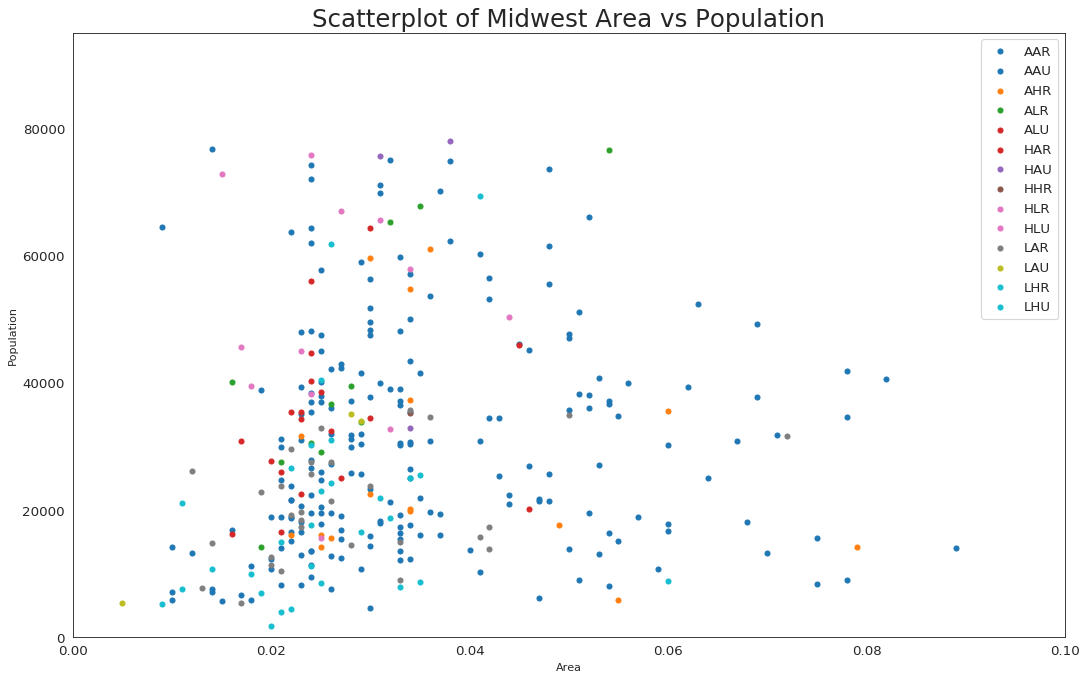

In [3]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(df['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize = (16, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data = df.loc[df.category == category, :],
                s = 20, c = [colors[i]], label = str(category))

# Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 95000),
              xlabel = 'Area', ylabel = 'Population')

plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize = 22)
plt.legend(fontsize = 12)
plt.show()

#### 2.2. Bubble plot with Encircling

• Sometimes you want to show a group of points within a boundary to emphasize their importance.

• In this example, you get the records from the dataframe that should be encircled and pass it to the encircle() described in the code below.

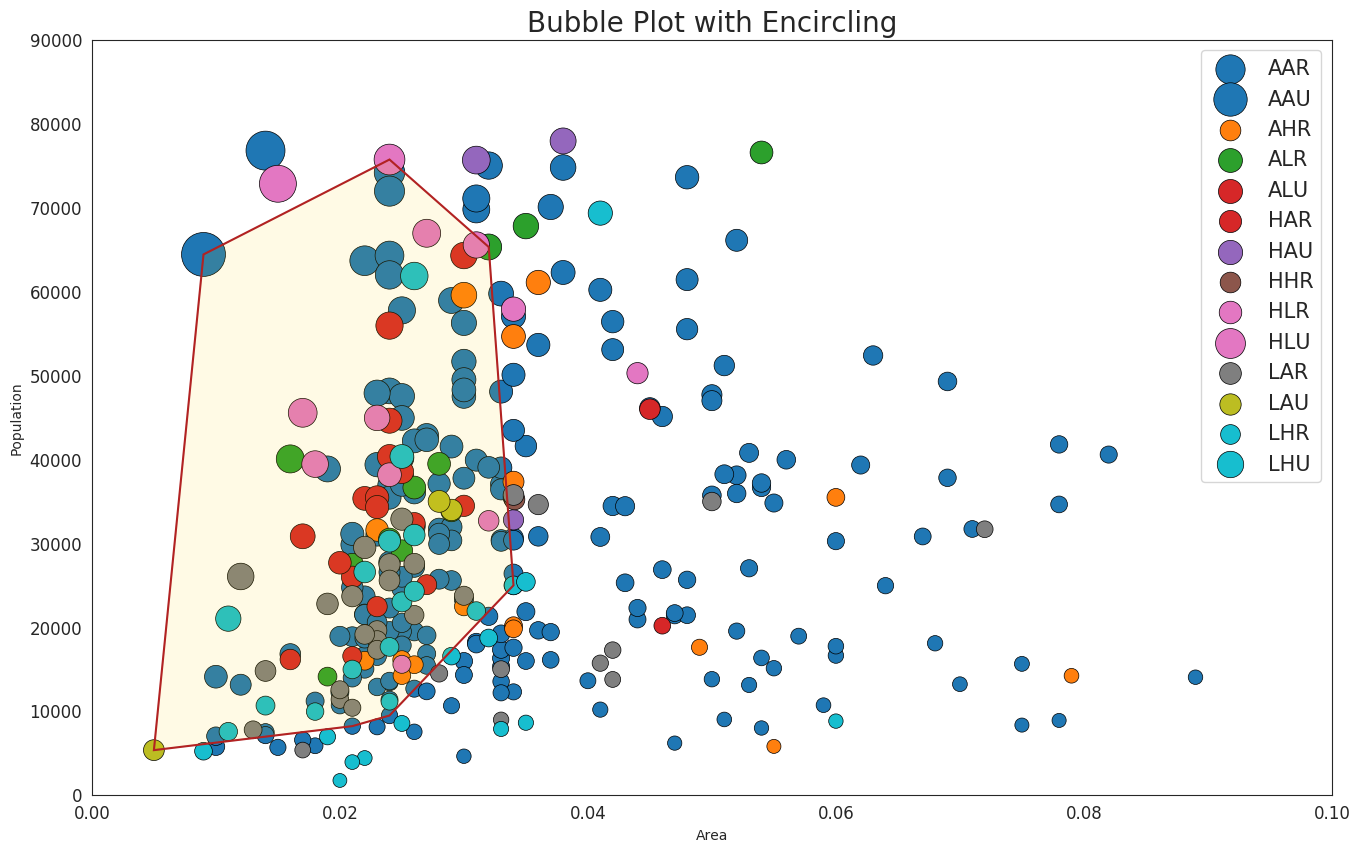

In [4]:
# As many color as there are unique df['category']
categories = np.unique(df['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

# Draw scatterplot with unique color for each category
fig = plt.figure(figsize = (16, 10), dpi = 100, edgecolor = 'k', facecolor = 'w')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data = df.loc[df.category == category, :], s = 'dot_size',
               c = [colors[i]], label = str(category), edgecolors = 'k', linewidths = 0.5)
# Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax = None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = df.loc[df.state == 'IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec = 'k', fc = 'gold', alpha = 0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec = 'firebrick', fc = 'none', linewidth = 1.5)

# Decorations
plt.gca().set(xlim = (0, 0.1), ylim = (0, 90000), xlabel = 'Area', ylabel = 'Population')
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 20)
plt.legend(fontsize = 15);

#### 2.3. Scatter plot with linear regression line of best fit

• If you want to understand how two variables change with respect to each other, the line of best fit is the way to go.

• The below plot shows how the line of best fit differs amongst various groups in the data.

• To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the hue='cyl' parameter from the sns.lmplot() call below.

In [5]:
# Import dataset
df1 = pd.read_csv('mpg_ggplot2.csv')
df1.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


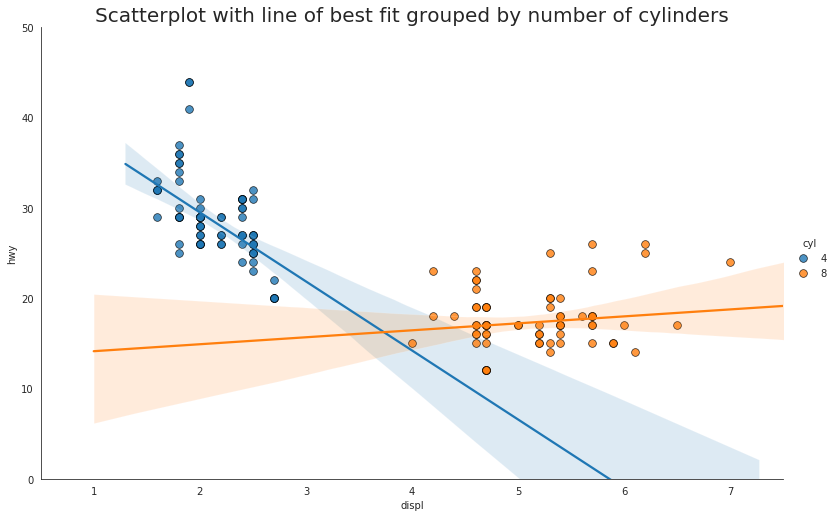

In [6]:
df1_select = df1.loc[df1.cyl.isin([4, 8]), :]

# Plot
sns.set_style('white')
gridobj = sns.lmplot(x = 'displ', y = "hwy", hue = 'cyl', data = df1_select,
                     height = 7, aspect = 1.6, robust = True, palette = 'tab10',
                     scatter_kws = dict(s = 60, linewidths = 0.7, edgecolors = 'k'))
# Decorations
gridobj.set(xlim = (0.5, 7.5), ylim = (0, 50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders', fontsize = 20);

#### 2.4. Jittering with stripplot

• Often multiple datapoints have exactly the same X and Y values.

• As a result, multiple points get plotted over each other and hide.

• To avoid this, jitter the points slightly so you can visually see them.

• This is convenient to do using seaborn’s stripplot().

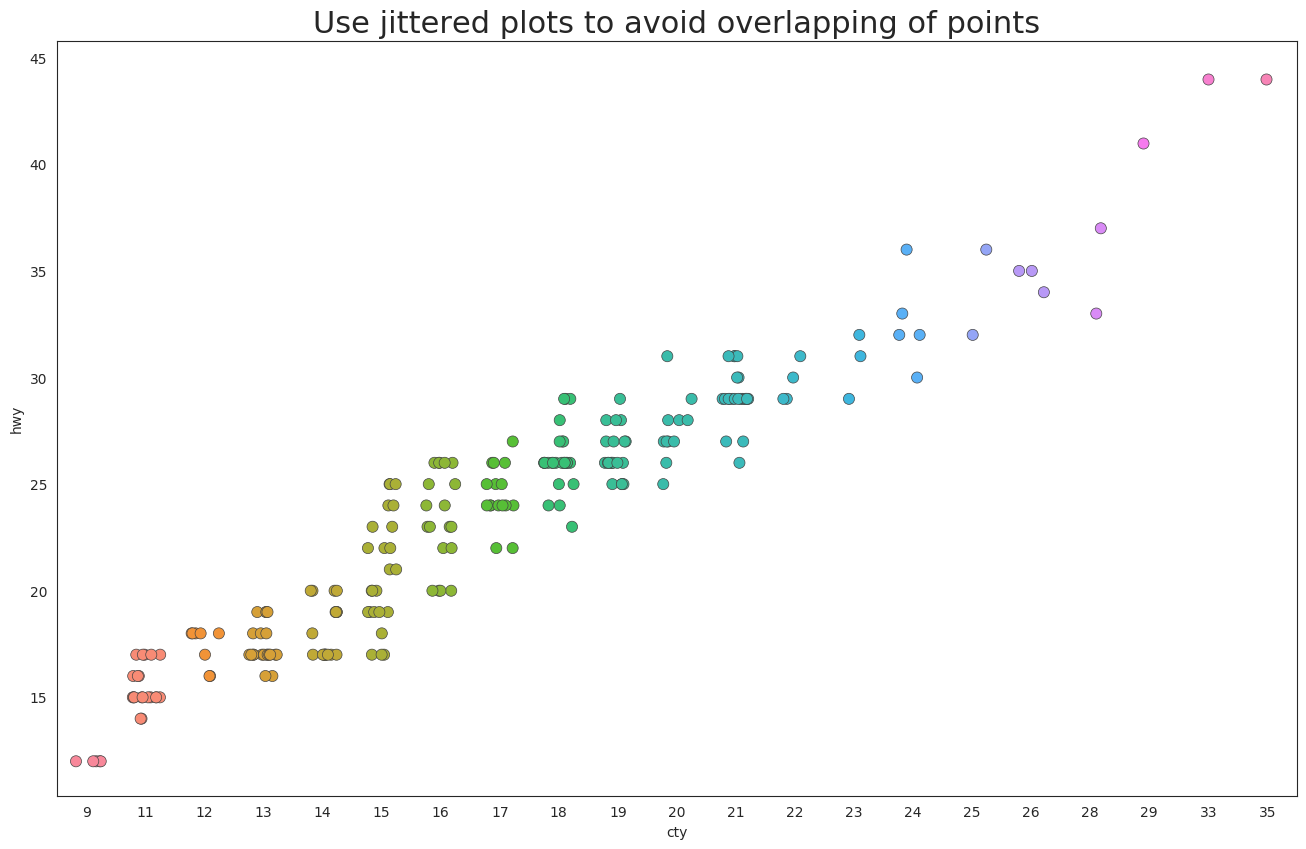

In [7]:
# Draw Stripplots
fig, ax = plt.subplots(figsize = (16, 10), dpi = 100)
sns.stripplot(df1.cty, df1.hwy, jitter = 0.25, size = 8, ax = ax, linewidth = 0.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize = 22);

#### 2.5. Counts Plot

• Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot.

• So, larger the size of the point more is the concentration of points around that.

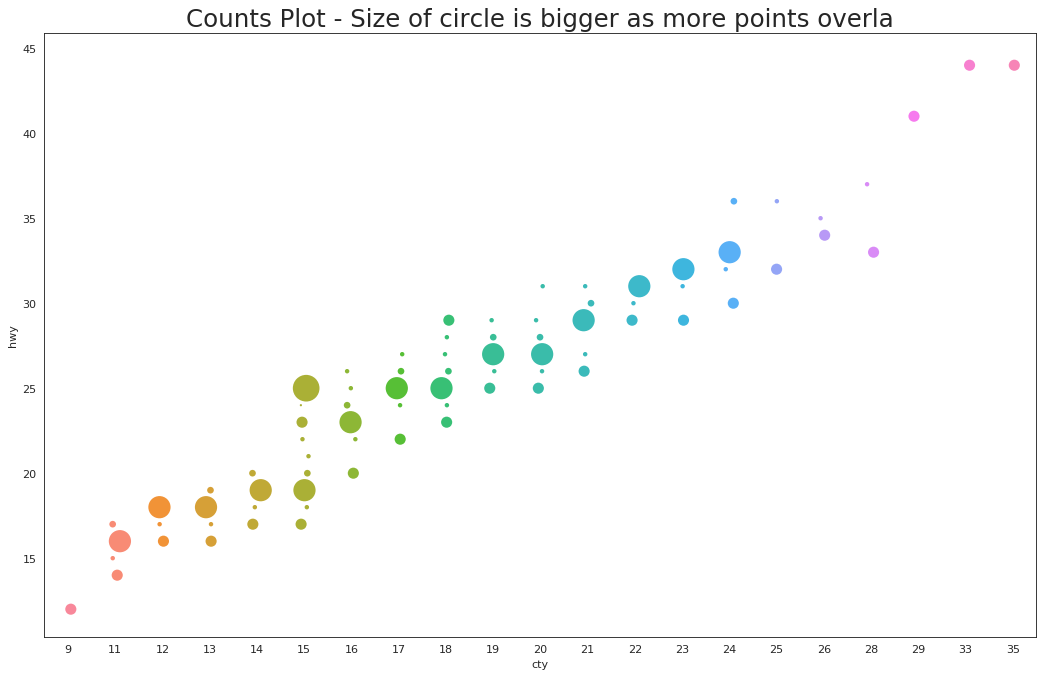

In [14]:
df1_counts = df1.groupby(['hwy', 'cty']).size().reset_index(name = 'counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize = (16, 10), dpi = 80)
sns.stripplot(df1_counts.cty, df1_counts.hwy, size = df1_counts.counts * 2, ax = ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overla', fontsize = 22);